In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson, nbinom
import seaborn as sns
import pandas as pd

from Model import Model
from PlaceInputs import PlaceInputs
from utils import *
import configs

# Parameters and Initialization

rec_strength=9.0 [0, 3, 6, 9, 12, 15]

weight_bias=-10 [-200, -100, -50, -10, 0, 10]

divisive_normalization=30.0 [15, 30, 45, 60]

plasticity_bias = -0.7 [-1.0, -0.9, -0.7, -0.6, -0.4]

In [2]:
# Parameters
N_inp = 2000
N_bar = 2000
num_states = 100

In [47]:
params = {}

In [48]:
place_inputs = PlaceInputs(N_inp, num_states).get_inputs()
model = Model(N_inp, N_bar, num_states, **params)

In [49]:
cache_states = [20, 30, 70]

# Run Task

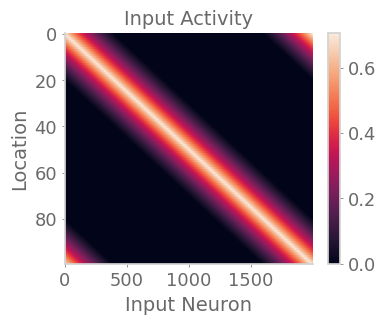

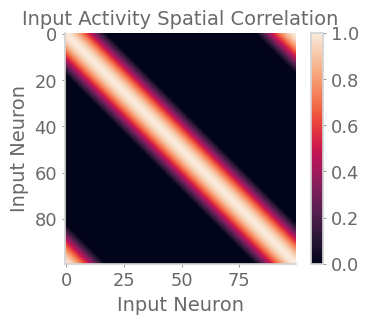

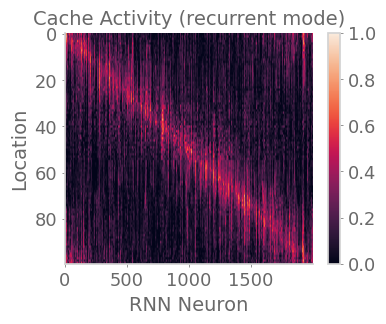

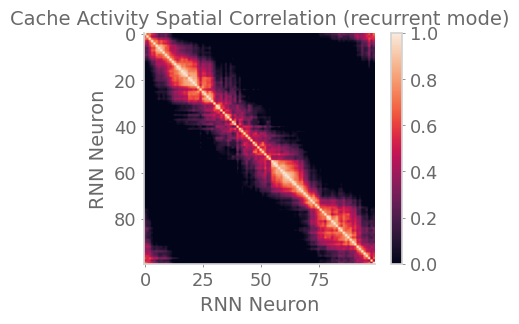

Sparsity: 0.31433


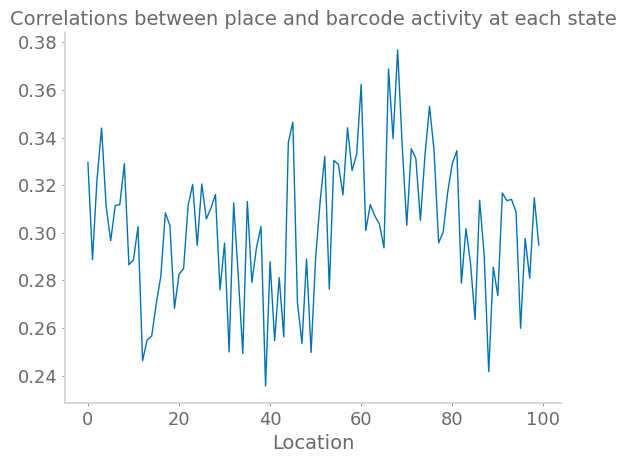

Now I just cached at location: 20


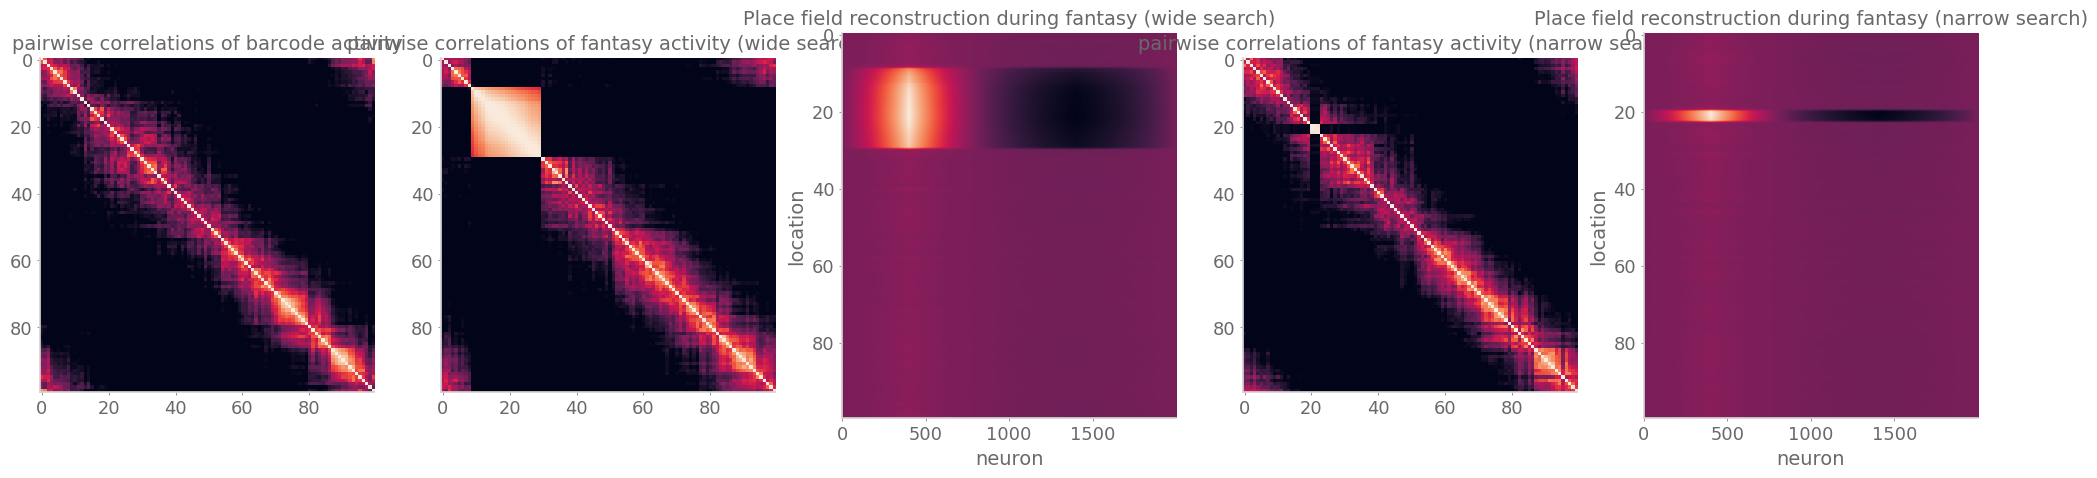

Now I just cached at location: 30


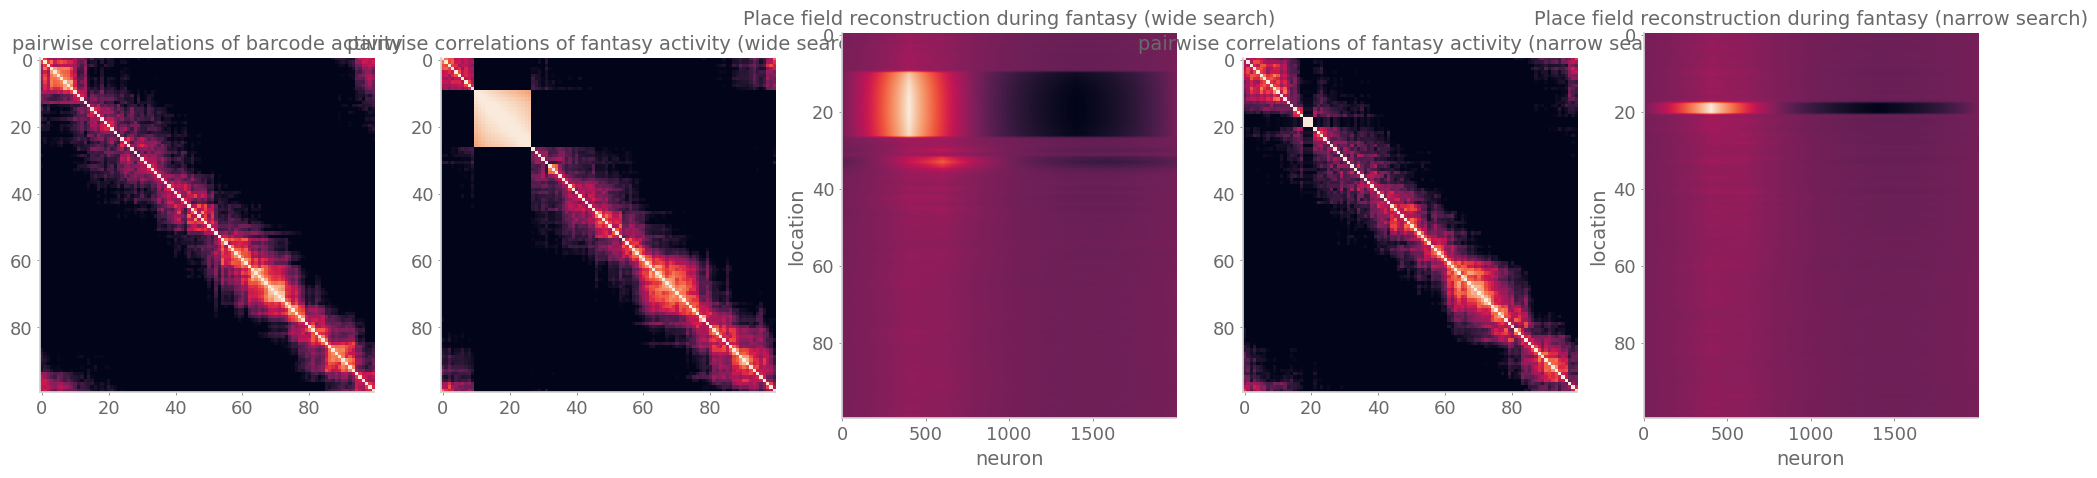

Now I just cached at location: 70


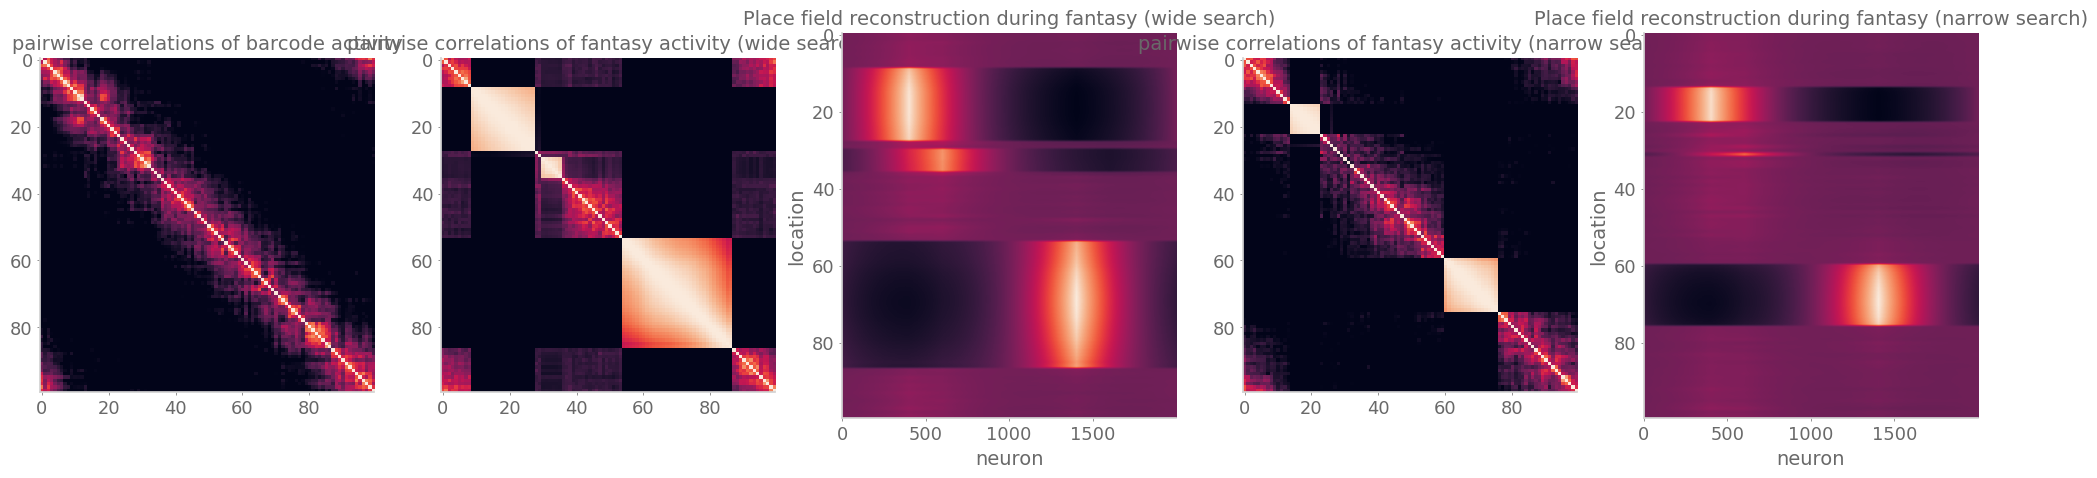

In [50]:
model.reset()
cache_acts = []
cache_acts_over_time = []
figsize=(4,3)

_, input_acts, _, _ = model.run_nonrecurrent(place_inputs)
plt.figure(figsize=figsize)
plt.imshow(input_acts, vmin=0,  aspect='auto')
plt.xlabel("Input Neuron")
plt.ylabel("Location")
plt.colorbar()
plt.title("Input Activity")
plt.show()

plt.figure(figsize=figsize)
plt.imshow(pairwise_correlations_centered(input_acts), vmin=0, vmax=1)
plt.colorbar()
plt.title("Input Activity Spatial Correlation")
plt.xlabel("Input Neuron")
plt.ylabel("Input Neuron")
plt.show()

_, acts, _, _ = model.run_recurrent(place_inputs)
plt.figure(figsize=figsize)
plt.imshow(acts, vmin=0, vmax=1, aspect='auto')
plt.xlabel("RNN Neuron")
plt.ylabel("Location")
plt.colorbar()
plt.title("Cache Activity (recurrent mode)")
plt.show()

plt.figure(figsize=figsize)
plt.imshow(pairwise_correlations_centered(acts), vmin=0, vmax=1)
plt.xlabel("RNN Neuron")
plt.ylabel("RNN Neuron")
plt.colorbar()
plt.title("Cache Activity Spatial Correlation (recurrent mode)")
plt.show()

print(f'Sparsity: {np.mean(acts>0)}')

acts_normalized = normalize(acts, ax=0)
inputs_normalized = normalize(input_acts, ax=0)
corrs = [np.corrcoef(acts_normalized[i], inputs_normalized[i])[0, 1] for i in range(num_states)]
plt.title("Correlations between place and barcode activity at each state")
plt.xlabel("Location")
plt.plot(corrs)
plt.show()

for cache_state in cache_states:
    
    fig, ax = plt.subplots(1, 5, figsize=(25, 5))
    
    print("Now I just cached at location:", cache_state)
    preacts, acts, _, acts_over_time = model.run_recurrent(place_inputs, n_zero_input=20)
    model.update(place_inputs[cache_state], acts[cache_state], preacts[cache_state])
    cache_acts.append(acts.copy())
    cache_acts_over_time.append(acts_over_time.copy())
    
    _, acts, _, _ = model.run_recurrent(place_inputs)
    ax[0].set_title("pairwise correlations of barcode activity")
    ax[0].imshow(pairwise_correlations_centered(acts), vmin=0, vmax=1)

    _, acts, reconstruct, _ = model.run_wide_recall(place_inputs)
    ax[1].set_title("pairwise correlations of fantasy activity (wide search)")
    ax[1].imshow(pairwise_correlations_centered(acts), vmin=0, vmax=1)
    ax[2].set_xlabel("neuron")
    ax[2].set_ylabel("location")
    ax[2].imshow(reconstruct, aspect='auto')
    ax[2].set_title("Place field reconstruction during fantasy (wide search)")
    
    _, acts, reconstruct, _ = model.run_narrow_recall(place_inputs)
    ax[3].set_title("pairwise correlations of fantasy activity (narrow search)")
    ax[3].imshow(pairwise_correlations_centered(acts), vmin=0, vmax=1)
    ax[4].set_xlabel("neuron")
    ax[4].set_ylabel("location")
    ax[4].imshow(reconstruct, aspect='auto')
    ax[4].set_title("Place field reconstruction during fantasy (narrow search)")
    plt.show()
    

Now I just cached at location: 70


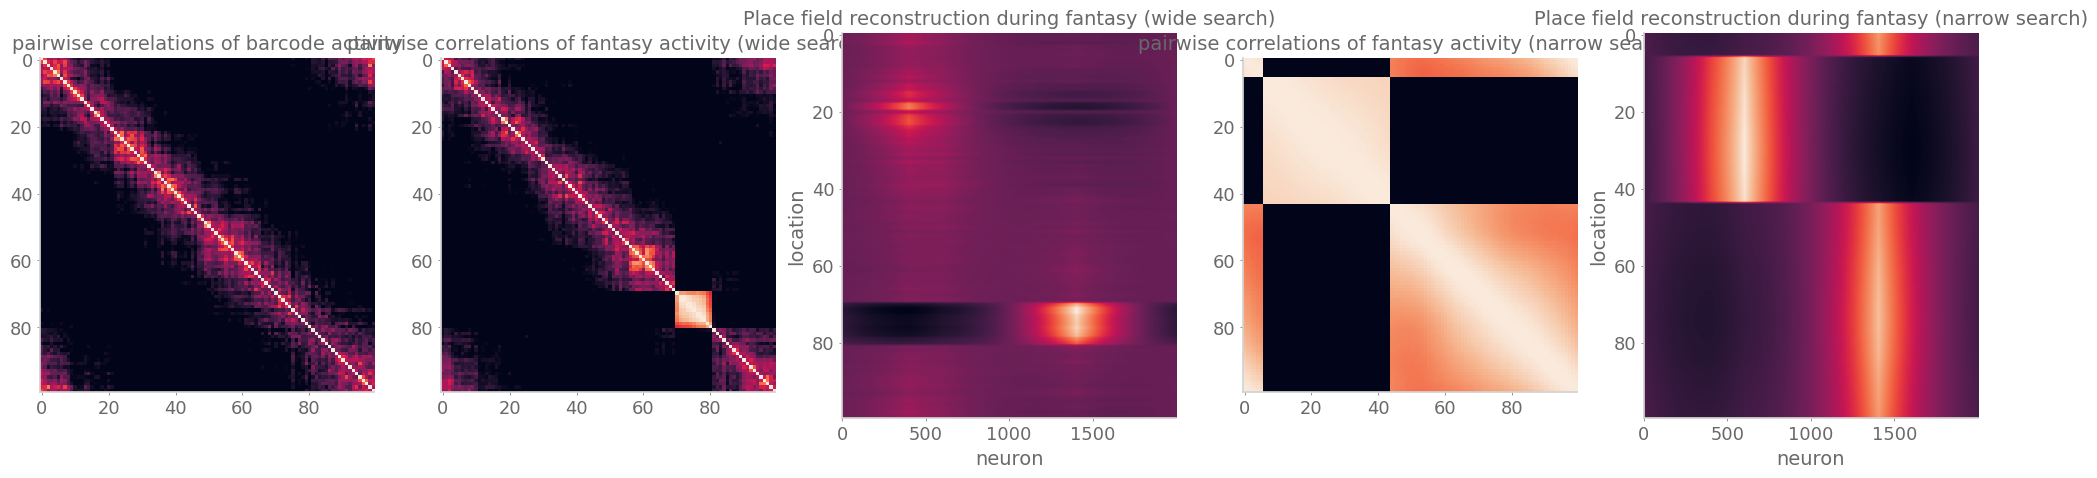

In [46]:
fig, ax = plt.subplots(1, 5, figsize=(25, 5))

print("Now I just cached at location:", cache_state)

_, acts, _, _ = model.run_recurrent(place_inputs)
ax[0].set_title("pairwise correlations of barcode activity")
ax[0].imshow(pairwise_correlations_centered(acts), vmin=0, vmax=1)

_, acts, reconstruct, _ = model.run_wide_recall(place_inputs)
ax[1].set_title("pairwise correlations of fantasy activity (wide search)")
ax[1].imshow(pairwise_correlations_centered(acts), vmin=0, vmax=1)
ax[2].set_xlabel("neuron")
ax[2].set_ylabel("location")
ax[2].imshow(reconstruct, aspect='auto')
ax[2].set_title("Place field reconstruction during fantasy (wide search)")

_, acts, reconstruct, _ = model.run_recall(5, place_inputs)
ax[3].set_title("pairwise correlations of fantasy activity (narrow search)")
ax[3].imshow(pairwise_correlations_centered(acts), vmin=0, vmax=1)
ax[4].set_xlabel("neuron")
ax[4].set_ylabel("location")
ax[4].imshow(reconstruct, aspect='auto')
ax[4].set_title("Place field reconstruction during fantasy (narrow search)")
plt.show()